In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
products = pd.read_csv('products.csv')
order_products = pd.read_csv('order_products__prior.csv')
orders = pd.read_csv('orders.csv')

products = products[['product_name', 'product_id']]
order_products = order_products[['product_id', 'order_id']]
orders = orders[['order_id', 'order_hour_of_day', 'order_dow']]
orders = orders.set_index('order_id')

In [45]:
row = 0
cookie_id = []
cereal_id = []
ice_cream_id = []
coffee_id = []
apple_id = []
broccoli_id = []
for product in products['product_name']:
    if re.search('[Cc]ookie', product) is not None:
        cookie_id.append(products['product_id'].loc[row])
    if re.search('[Cc]ereal', product) is not None:
        cereal_id.append(products['product_id'].loc[row])
    if re.search('[Ii]ce [Cc]ream', product) is not None:
        ice_cream_id.append(products['product_id'].loc[row])
    if re.search('[Cc]offee', product) is not None:
        coffee_id.append(products['product_id'].loc[row])
    if re.search('[Aa]pple', product) is not None:
        apple_id.append(products['product_id'].loc[row])
    if re.search('[Bb]roccoli', product) is not None:
        broccoli_id.append(products['product_id'].loc[row])
    row += 1

In [46]:
def times_from_id(prod_id_list):
    hours = []
    for prod in prod_id_list:
        is_prod_id = order_products['product_id'] == prod
        order_id = order_products[is_prod_id]

        for order in order_id['order_id']:
            hour_of_day = orders['order_hour_of_day'].loc[order]
            hours.append(hour_of_day)
    return hours

In [47]:
cookie_hours = times_from_id(cookie_id)
cereal_hours = times_from_id(cereal_id)
coffee_hours = times_from_id(coffee_id)
apple_hours = times_from_id(apple_id)
broccoli_hours = times_from_id(broccoli_id)
ice_cream_hours = times_from_id(ice_cream_id)

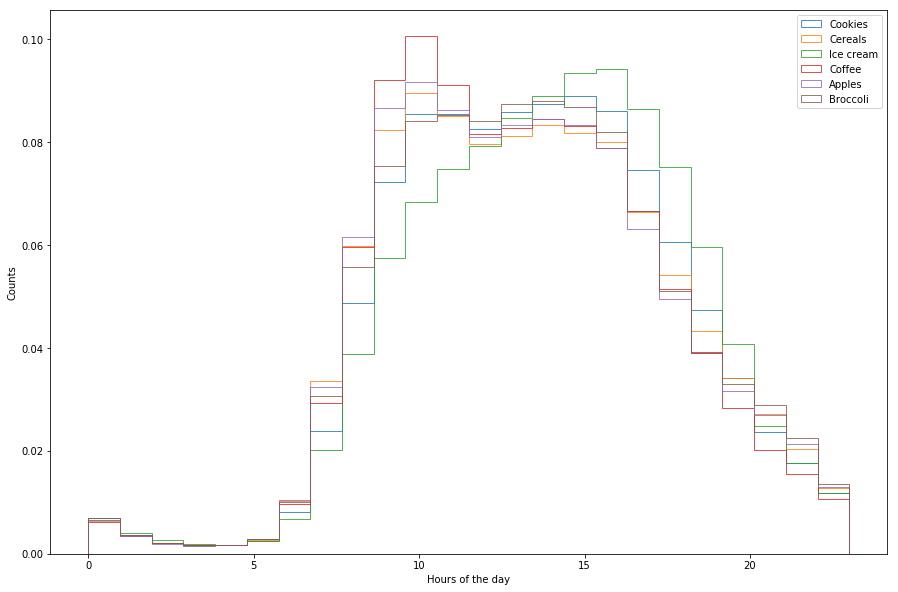

In [49]:
plt.hist(cookie_hours, bins = 24, alpha = 0.8, normed=True, label = 'Cookies', histtype = 'step')
plt.hist(cereal_hours, bins = 24, alpha = 0.8, normed=True, label = 'Cereals', histtype = 'step')
plt.hist(ice_cream_hours, bins = 24, alpha = 0.8, normed=True, label = 'Ice cream', histtype = 'step')
plt.hist(coffee_hours, bins = 24, alpha = 0.8, normed=True, label = 'Coffee', histtype = 'step')
plt.hist(apple_hours, bins = 24, alpha = 0.8, normed=True, label = 'Apples', histtype = 'step')
plt.hist(broccoli_hours, bins = 24, alpha = 0.8, normed=True, label = 'Broccoli', histtype = 'step')

plt.ylabel('Counts')
plt.xlabel('Hours of the day')
plt.legend(loc = 'upper right')
plt.rcParams['figure.figsize'] = [15, 10]
plt.show()

# Products vs hour of the day

This plot shows different products purchased during different hours of the day. Fristly we can see that people mostly shop early in the morning or late in the evening. It can be seen that breakfast foods—such as cereals and coffee—are purchaed in the morning. Similarly apples are purchased more in the morning, but brocolli and cookies slighly favor afternoon hours. Ice cream heavily favors afternoon hours, and is purchased later than other evening items.